# IPywidgets

<br><center><h1 style="font-size:2em"> Sleep Health and Lifestyle</h1></center>
<br>
Ipywidgets is a dynamic HTML widget library for Jupyter Notebook and Jupyter Lab. In this notebook, we'll explore its versatility and its role in data analysis. Our dataset, <a href="https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/">Sleep health and lifestyle</a> from <a href="https://www.kaggle.com">Kaggle</a>, offers diverse variables such as sleep quality, heart rate, physical activity level, and BMI. We want to build an interactive dashboard with this dataset.

<br>Data Source: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/download?datasetVersionNumber=2
<br>

<table>
<tr>
<td><img src="https://storage.googleapis.com/gweb-uniblog-publish-prod/images/sleep-01.width-1600.format-webp.webp" align="middle" style="width:550px;height:360px;"/></td>

# Step 1: Exploring the Dataset

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact

In [18]:
#read and store the dataset
sleep = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
sleep.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Some columns in the dataset require description:
- Quality of Sleep (scale: 1-10)
- Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
- Stress Level (scale: 1-10)
- BMI Category: Underweight, Normal, Overweight
- Blood Pressure (systolic/diastolic): indicated as systolic pressure over diastolic pressure.
- Heart Rate (bpm): The resting heart rate of the person in beats per minute.
- Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

Let's see some statistics about the "sleep" dataset 

## 1.1. Know more about the dataset

How clean is our dataset?

In [19]:
#calculate the mean of Null values to see the percentage of nulls
sleep.isna().mean().round(2)

Person ID                  0.00
Gender                     0.00
Age                        0.00
Occupation                 0.00
Sleep Duration             0.00
Quality of Sleep           0.00
Physical Activity Level    0.00
Stress Level               0.00
BMI Category               0.00
Blood Pressure             0.00
Heart Rate                 0.00
Daily Steps                0.00
Sleep Disorder             0.59
dtype: float64

Based on dataset the NaN values in Sleep Disorder column are about not having sleep disorders.

In [20]:
# convert NaN values in sleep disorder to 'NaN' as a string value
sleep.loc[sleep['Sleep Disorder'].isna() , 'Sleep Disorder'] = 'None'

<br>Let's choose a categorical variable and look further into it

## 1.2. Exploring Sample Variable (BMI Distribution)

In [21]:
# Explore the BMI categories
sleep['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

This dataset has two categories with the same meaning. We will consolidate them into a single value for a more precise evaluation. 

In [22]:
# Consolidate two categories 'Normal' and 'Normal weight'
sleep.loc[sleep['BMI Category'] == 'Normal Weight', 'BMI Category'] = 'Normal'

#Count the values per BMI category
sleep['BMI Category'].value_counts()

BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

## 1.3. Let's study this dataset with visualization 

In this section, we generate various plots involving different combinations of categorical and numeric variables to uncover potential relationships. While we showcase three plots as examples, the possibilities are extensive, allowing for exploration with additional combinations.

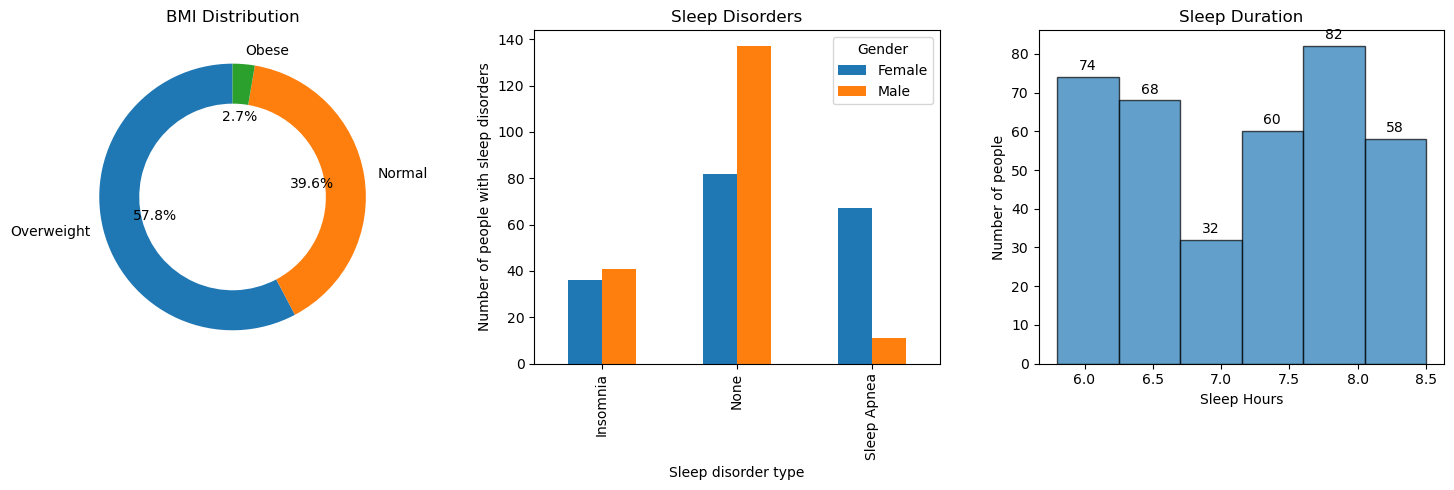

In [23]:
# Create a figure with three subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))


# Create a pie chart in the first subplot to see the distribution of BMI categories
wedges, texts, autotexts = axs[0].pie(sleep['BMI Category'].value_counts(), labels=sleep['BMI Category'].unique(),
                                  autopct='%1.1f%%',startangle=90, wedgeprops=dict(width=0.3))

# Add a circle at the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.2, color='white', linewidth=0.8)
axs[0].add_patch(centre_circle)
axs[0].set_title('BMI Distribution')



# Extract data for sleep disorder and gender for second bar chart
sleep_disorder = sleep.groupby(['Sleep Disorder', 'Gender']).size().unstack()

# Plot bar chart with bars next to each other
axs[1] = sleep_disorder.plot(kind='bar', ax=axs[1])

axs[1].legend(title='Gender', loc='upper right')
axs[1].set_ylabel('Number of people with sleep disorders')
axs[1].set_xlabel('Sleep disorder type')
axs[1].set_title('Sleep Disorders')


# Plot a histogram in the third subplot to indicate the distribution of sleep duration with 6 bins
n, bins, patches = axs[2].hist(sleep['Sleep Duration'], bins=6, edgecolor='black', alpha=0.7)


# Display values on each bar
for bin, patch in zip(bins, patches):
    height = patch.get_height()
    if height > 0:  # Exclude empty bins
        axs[2].text(bin + (bins[1] - bins[0]) / 2, height + 1, f'{int(height)}', ha='center', va='bottom')


axs[2].set_title('Sleep Duration')
axs[2].set_xlabel('Sleep Hours')
axs[2].set_ylabel('Number of people')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined plots
plt.show()


#### BMI Donut Chart
- The BMI Distribution Donut illustrates the distribution of participants across three BMI categories.
- According to the chart, over 60 percent of individuals in this study have a BMI over 25, while the remaining participants fall within the normal BMI range.
   
#### Sleep Disorder Bar chart
- The sleep disorder chart indicates a higher prevalence of Sleep Apnea among female participants in this study.

#### Sleep Hours Histogram
- The sleep hours histogram provides insight into the distribution of people based on their sleep duration.
- For instance, around 22 percent of participants sleep between 7.5 to 8 hours.

# Step 2: Basic widgets with IPywidgets

Using IPywidgets empowers the creation of interactive widgets, significantly enhancing the data analysis experience. This tool proves invaluable for researchers, providing a dynamic platform to gain deeper insights into their results.

<b> Lets see how we can build simple interactive widgets 

## 2.1. Slider

In [24]:
# Create a slider to dynamically adjust values within a specified range
# Use IntSlider for integers and FloatSlider for floating-point numbers
# The 'value' parameter sets the default value upon code execution
# The 'description_width': 'initial' parameter ensures that the words before the slider are fully displayed.


slider = widgets.FloatSlider(value=sleep['Age'].mean(), min=sleep['Age'].min(), 
                             max=sleep['Age'].max(), step=1, description='Age:',
                             style={'description_width': 'initial', 'description_font_size': '16px'})
display(slider)

FloatSlider(value=42.18449197860963, description='Age:', max=59.0, min=27.0, step=1.0, style=SliderStyle(descr…

<br>
The slider allows you to smoothly navigate between the minimum and maximum age values, facilitating interactive exploration. <br>
This slider can be utilized for dynamic adjustments in plots and charts.
<br>

## 2.2. Dropdown menu

In [25]:
# Create a dropdown widget for selecting the variable
column_selector = widgets.Dropdown(
    options=sleep.columns,
    description='Select a Column:',
    disabled=False,
    style={'description_width': 'initial', 'description_font_size': '16px'})

display(column_selector)

Dropdown(description='Select a Column:', options=('Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration'…

## 2.3. Check Box

In [26]:
checkbox = widgets.Checkbox(
    value=False,  # Initial state of the checkbox
    description='Check me',  
    disabled=False 
)

# Function to handle checkbox changes
def handle_checkbox_change(change):
    if change['new']:
        print("Checkbox is checked!")
    else:
        print("Checkbox is unchecked.")

# Attach the function to the checkbox's value attribute
checkbox.observe(handle_checkbox_change, names='value')

display(checkbox)

Checkbox(value=False, description='Check me')

## 2.4. Interact Function

Interact is a function in the ipywidgets library that provides a simple way to create interactive widgets in Jupyter notebooks. It automatically generates UI controls (such as sliders, dropdowns, text boxes) based on the parameters of a function, allowing users to interactively explore and visualize data.

Here's a basic example of how interact works:

In [27]:
# Example function to multiply two numbers
def multiply(a, b):
    return a * b

# Use interact to create sliders for the function parameters
interact(multiply, a=(0, 10), b=(0, 10))


interactive(children=(IntSlider(value=5, description='a', max=10), IntSlider(value=5, description='b', max=10)…

<function __main__.multiply(a, b)>

# Step 3: Sleep Data Analysis with IPywidgets

## 3.1 Donut Chart

In [28]:
categ_var = ['BMI Category','Gender', 'Occupation', 'Quality of Sleep', 'Stress Level',
             'Sleep Disorder']

# Function to generate donut chart based on selected categorical variable
def donut_chart(variable):
    threshold = .05
    series = sleep[variable]
    value_counts = series.value_counts()
    value_pcts = series.value_counts(normalize=True)
    total = value_counts.sum()
    labels = [label if pct > threshold else '' for label, pct in value_pcts.items()]
    autopct = lambda pct: '%.0f%%' % pct if pct > threshold * 100 else ''
    
    # Plot donut chart
    plt.pie(
        value_counts,
        labels=labels,
        autopct=autopct,
        startangle=90,
        wedgeprops=dict(width=0.4),
        pctdistance=0.85,
    )
    centre_circle = plt.Circle((0, 0), 0.7, color='white', linewidth=0.8)
    plt.gca().add_artist(centre_circle)

# Interact function to update the chart based on dropdown selection
widgets.interact(donut_chart, variable=categ_var);

interactive(children=(Dropdown(description='variable', options=('BMI Category', 'Gender', 'Occupation', 'Quali…

## 3.2. Bar Chart and Dropdown Menu

In [29]:
# Function to generate bar chart based on selected variable
def generate_bar_chart(selected_variable):
    plt.figure(figsize=(20, 10))

    # Extract data for the selected variable
    selected_data = sleep.groupby(['Sleep Disorder', selected_variable]).size().unstack()

    # Plot bar chart with bars next to each other
    selected_data.plot(kind='bar', stacked=False)
    
    plt.title(f'Distribution of Sleep Disorder Based on {selected_variable}')
    plt.xlabel('Sleep Disorder Type')
    plt.ylabel('Count')
    plt.legend(title=selected_variable)

    plt.show()

# Dropdown widget for selecting a variable
dropdown_variable = widgets.Dropdown(
    options=['Gender', 'Quality of Sleep', 'BMI Category'],
    value='Gender',
    description='Select Variable:',
    disabled=False,
)

# Interact function to update the chart based on dropdown selection
interact(generate_bar_chart, selected_variable=dropdown_variable)


interactive(children=(Dropdown(description='Select Variable:', options=('Gender', 'Quality of Sleep', 'BMI Cat…

<function __main__.generate_bar_chart(selected_variable)>

## 3.3. Histogram, Slider and Dropdown Menu

In [30]:
continuous_var = [ 'Sleep Duration', 'Age','Physical Activity Level', 'Heart Rate', 'Daily Steps']

def histogram(variable, bin_count):
    series = sleep[variable]
    plt.hist(series, bins=bin_count, edgecolor='black', alpha=0.7)

    plt.title(variable)
    plt.xlabel('')
    plt.ylabel('Number of people')

widgets.interact(histogram, variable=continuous_var, bin_count=(3, 10));

interactive(children=(Dropdown(description='variable', options=('Sleep Duration', 'Age', 'Physical Activity Le…

## 3.4. Correlation Matrix and Check box

In [31]:
quant_var = ['Age', 'Sleep Duration','Quality of Sleep', 'Physical Activity Level',
             'Stress Level', 'Heart Rate', 'Daily Steps']
def corr_matrix(**kwargs):
  variables = [key for key, value in kwargs.items() if value]
  return sleep[variables].corr()

widgets.interact(
    corr_matrix,
    **dict(zip(quant_var, [True] * len(quant_var))),
);

interactive(children=(Checkbox(value=True, description='Age'), Checkbox(value=True, description='Sleep Duratio…

- There exists a strong positive correlation (0.88) between the __quality of sleep__ and __sleep duration__, suggesting that as one metric improves, the other tends to follow suit.

- __Stress level__ exhibits a notable negative correlation with both __sleep duration__ and __sleep quality__, indicating that higher __stress level__ is associated with diminished sleep metrics (correlation coefficients: -0.81 and -0.90, respectively).

- Conversely, __heart rate__ demonstrates a positive correlation with __stress level__, implying that elevated stress tends to coincide with higher heart rates.

- __Daily steps__ show a significant positive correlation (0.77) solely with the __physical activity level__, suggesting a strong association between these two variables while exhibiting minimal correlation with other factors.

![IPywidgets Library](https://lavca.org/app/uploads/2016/12/Charts-Graphs-e1481821674338.jpg)

- It is important to investigate various subsets of variables. Slicing and dicing data is time consuming due to its multivariate nature. Since such exploratory analysis requires writing many lines of code, critical insights within the data might be overlooked because of complexity of exploration.

- Ipywidgets is an intuitive dashboarding tool that greatly simplifies the exploration of diverse subsets of variables. Users can effortlessly slice and dice their data with various dimensions by directly interacting with the visualizations in the tool.

# Homework

*Complete the code to see your selected part of dataset*

In [32]:
# 1- choose any categorical variable in the 'sleep' dataset in put it in 'your Variable'
## 2 - chosse any numerical variable and put it in the 'numeric'
### 3 - you need to find the min and max of your numerical variable and complete the interact function

# Function to update the dataset based on widget values
def update_dataset(numeric_max, selected_value):
    filtered_data = sleep[(sleep['numeric'] <= numeric_max)]
    
    if selected_value != 'All':
        filtered_data = filtered_data[filtered_data['your Variable'] == selected_value]
    
    display(filtered_data)

# Interact function to dynamically update the dataset
interact(update_dataset, numeric_max=(..., ....), selected_value=['All'] + list(sleep['your Variable'].unique()))


SyntaxError: invalid syntax (3455846638.py, line 15)

### Answer

In [43]:
# any selection of the following categorical and numeric variables will work
numeric_var = ['Age', 'Physical Activity Level', 'Heart Rate', 'Daily Steps']
categorical_var = ['Gender', 'Quality of Sleep', 'Stress Level', 'BMI Category', 'Sleep Disorder']

#  age as numeric and quality of sleep as categorical
numeric_max = sleep.Age.max()
numeric_min = sleep.Age.min()

# Function to update the dataset based on widget values, 
#replace age with numeric_max and sleep_quality with selected_value

def update_dataset(age, sleep_quality):
    filtered_data = sleep[(sleep['Age'] <= age)]
    
    if sleep_quality != 'All':
        filtered_data = filtered_data[filtered_data['Quality of Sleep'] == sleep_quality]
    
    display(filtered_data)

# Interact function to dynamically update the dataset
interact(update_dataset, age=(numeric_min, numeric_max), sleep_quality=['All'] + list(sleep['Quality of Sleep'].unique()))



interactive(children=(IntSlider(value=43, description='age', max=59, min=27), Dropdown(description='sleep_qual…

<function __main__.update_dataset(age, sleep_quality)>

In [35]:
sleep

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


## Dig deeper 

### IPywidgets Documentation

https://ipywidgets.readthedocs.io/en/stable/